<a href="https://colab.research.google.com/github/shxvaayy/Sock-price-prediction/blob/main/Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import sys
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ds_train = pd.read_csv("Google_Stock_Price_Train.csv")
ds_train

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


In [3]:
ds_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [4]:
ds_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [5]:
training_set = ds_train.iloc[:,1:2]
training_set

,Open
0,325.25
1,331.27
2,329.83
3,328.34
4,322.04
...,...
1253,790.90
1254,790.68
1255,793.70
1256,783.33


In [6]:
training_set.shape

(1258, 1)

In [7]:
from sklearn.preprocessing import MinMaxScaler
MMscaler = MinMaxScaler(feature_range = (0,1))
scaled_train_set = MMscaler.fit_transform(training_set)
scaled_train_set

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [8]:
X_train = []
y_train = []
for i in range(30,1258):
    X_train.append(scaled_train_set[i-30:i,0])
    y_train.append(scaled_train_set[i,0])
X_train = np.array(X_train)
y_train = np.array(y_train)

In [9]:
print(X_train)
X_train.shape

[[0.08581368 0.09701243 0.09433366 ... 0.0440695  0.04648783 0.04745517]
 [0.09701243 0.09433366 0.09156187 ... 0.04648783 0.04745517 0.04873875]
 [0.09433366 0.09156187 0.07984225 ... 0.04745517 0.04873875 0.03936305]
 ...
 [0.88637547 0.87032145 0.88563137 ... 0.95475854 0.95204256 0.95163331]
 [0.87032145 0.88563137 0.90743359 ... 0.95204256 0.95163331 0.95725128]
 [0.88563137 0.90743359 0.91571173 ... 0.95163331 0.95725128 0.93796041]]


(1228, 30)

In [10]:
y_train

array([0.04873875, 0.03936305, 0.04137213, ..., 0.95725128, 0.93796041,
       0.93688146])

In [11]:
X_train =  np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_train.shape

(1228, 30, 1)

In [12]:
X_train

array([[[0.08581368],
        [0.09701243],
        [0.09433366],
        ...,
        [0.0440695 ],
        [0.04648783],
        [0.04745517]],

       [[0.09701243],
        [0.09433366],
        [0.09156187],
        ...,
        [0.04648783],
        [0.04745517],
        [0.04873875]],

       [[0.09433366],
        [0.09156187],
        [0.07984225],
        ...,
        [0.04745517],
        [0.04873875],
        [0.03936305]],

       ...,

       [[0.88637547],
        [0.87032145],
        [0.88563137],
        ...,
        [0.95475854],
        [0.95204256],
        [0.95163331]],

       [[0.87032145],
        [0.88563137],
        [0.90743359],
        ...,
        [0.95204256],
        [0.95163331],
        [0.95725128]],

       [[0.88563137],
        [0.90743359],
        [0.91571173],
        ...,
        [0.95163331],
        [0.95725128],
        [0.93796041]]])

In [13]:
!pip install keras
!pip install tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

In [14]:
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences= True, input_shape = (X_train.shape[1],1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences= True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences= True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units=1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [15]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(X_train,y_train, epochs=100, batch_size=64)

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 29s 257ms/step - loss: 0.1208
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 116ms/step - loss: 0.0123
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - loss: 0.0064
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - loss: 0.0062
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - loss: 0.0055
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - loss: 0.0054
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - loss: 0.0048
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - loss: 0.0052
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - loss: 0.0049
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 0.0051
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - loss: 0.0038
Epoch 12/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 0.0039
Epoch 13/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - loss: 0.0044
Epoch 14/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 113ms/step - loss: 0.0041
Epoch 15/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step

In [16]:
ds_test = pd.read_csv("Google_Stock_Price_Train.csv")
actual_stock_price = ds_test.iloc[:500,1:2].values
ds_test

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


In [17]:
dataset_total = pd.concat((ds_train['Open'],ds_test['Open']),axis=0)
inputs = dataset_total[len(dataset_total)-len(ds_test)-30:].values

inputs = inputs.reshape(-1,1)
inputs = MMscaler.transform(inputs)

x_test = []
for i in range(30,500):
    x_test.append(inputs[i-30:i,0])
x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [18]:
pred_stock_price = regressor.predict(x_test)
pred_stock_price = MMscaler.inverse_transform(pred_stock_price)

15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step


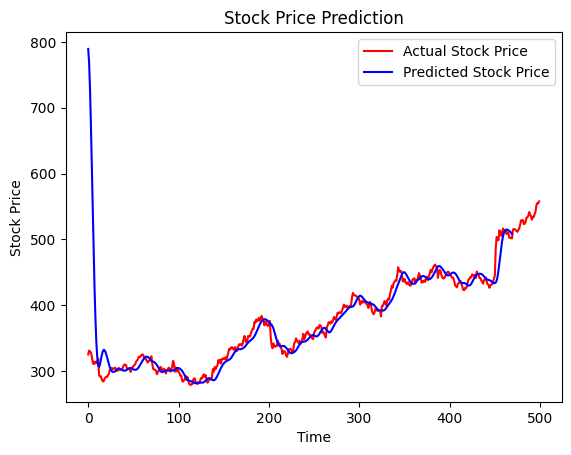

In [19]:
plt.plot(actual_stock_price,color='red',label='Actual Stock Price')
plt.plot(pred_stock_price,color='blue',label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
